## NLP Workshop

**Author:** Clare Corthell, [Luminant Data](http://luminantdata.com)

**Conference**: [Talking Machines](http://talkingmachin.es/events), Manila

**Date:** 18 February 2016

**Description:** Much of human knowledge is “locked up” in a type of data called text. Humans are great at reading, but are computers? This workshop leads you through open source data science libraries in python that turn text into valuable data, then tours an open source system built for the Wordnik dictionary to source definitions of words from across the internet.

**Goal**: Learn the basics of text manipulation and analytics with open sources tools in python.

------------------------

### Requirements

There are many great libraries and programmatic resources out there in languages other than python. For the purposes of a contained intro, I'll focus soley on Python today.

- [Python 2.7 Environment](http://www.thisisthegreenroom.com/2011/installing-python-numpy-scipy-matplotlib-and-ipython-on-lion/)
- [Anaconda](https://www.continuum.io/downloads), which includes 400 popular python packages
- [TextBlob](http://textblob.readthedocs.org/en/dev/install.html) (python library)

Give yourself a good chunk of time to troubleshoot installation if you're doing this for the first time. These resources are available for most platforms, including OSX and Windows.

#### Learning Resources

- NLTK [Online Book](http://www.nltk.org/book/)

### Setup

Go to the root of this repository

`cd < root directory >`

run the notebook

`ipython notebook`

In [153]:
%pwd 
# make sure we're running our script from the right place; 
# imports like "filename" are relative to where we're running ipython

u'/Users/clareputer/Documents/summer/nlp_workshop'

### Load A Text Dataset

Collection of TED talk transcripts from the ted.com website:

<img href="http://ted.com" src="assets/tedtranscript.png">

In [154]:
# file of half of history of ted talks from (http://ted.com)
# i've already preprocessed this in an easy-to-consume .csv file
filename = 'data/tedtalks.csv'

#### Storage and File types for text

Common text file types for text include **.json .csv .txt**. 

It is also common to store text with other data in **relational databases** or indexes.

In [155]:
# pandas, a handy and powerful data manipulation library
import pandas as pd

In [156]:
# this file has a header that includes column names
df = pd.DataFrame.from_csv(filename, encoding='utf8')

The pandas data structure **DataFrame** is like a spreadsheet. 

It's easy to select columns, records, or data points. There are a multitude of handy features in this library for manipulating data.

In [157]:
# look at a slice (sub-selection of records) of the first four records
df[:4]

,date,headline,speaker,transcript,url
0,2014-10-21 00:00:00,"A dance in a hurricane of paper, wind and light",Aakash Odedra,(Music) (Applause),http://www.ted.com/talks/aakash_odedra_a_dance...
1,2010-09-19 00:00:00,America's native prisoners of war,Aaron Huey,I'm here today to show my photographs of the ...,http://www.ted.com/talks/aaron_huey
2,2011-03-02 00:00:00,Visualizing ourselves ... with crowd-sourced data,Aaron Koblin,So I think data can actually make us more hum...,http://www.ted.com/talks/aaron_koblin
3,2011-03-02 00:00:00,Making sense of a visible quantum object,Aaron O'Connell,"This is a representation of your brain, and y...",http://www.ted.com/talks/aaron_o_connell_makin...


In [158]:
# look at a slice of one column
df['headline'][:4]

0      A dance in a hurricane of paper, wind and light
1                    America's native prisoners of war
2    Visualizing ourselves ... with crowd-sourced data
3             Making sense of a visible quantum object
Name: headline, dtype: object

In [159]:
# select one data point
df['headline'][2]

u'Visualizing ourselves ... with crowd-sourced data'

## The Basics

We're going to use **[TextBlob](http://textblob.readthedocs.org/en/dev/quickstart.html)** to manipulate our text data. It wraps a number of handy text manipulation tools like [NLTK](http://www.nltk.org/) and [pattern](http://www.clips.ua.ac.be/pages/pattern-en), making those easy to use under one library.

### Method and Python Package

We'll walk though all these methods by **posing questions of the data.** I'll number them for easy reference.

### Back to Background

**Linguistics**, or the scientific study of language, plays a large role in how we build methods to understand text.

**Computational Linguistics** is "field concerned with the statistical or rule-based modeling of natural language from a computational perspective." - [wp](https://en.wikipedia.org/wiki/Computational_linguistics)

# 1. Intuition for Text Analysis

In [160]:
from textblob import TextBlob

In [330]:
# create a textblob object with one transcript
t = TextBlob(df['transcript'][18])
print "Reading the transcript for '%s'" % df['headline'][18]

Reading the transcript for 'Three myths about corruption'


From the TextBlob object, we can get things like:
- **Frequency Analysis**
- **Noun Phrases**
- **Part-of-Speech Tags**
- **Tokenization**
- **Parsing**
- **Sentiment Polarity**
- **Word inflection**
- **Spelling correction**

Using the questions we pose, we'll motivate using these methods and explain them throughout this workshop.

### Q1. What is this text about?

There are many ways we could think about answering this question, but the first might be to look at the topics that the text describes.

Let's look at a sentence in the middle:

In [163]:
t.sentences[21]

Sentence("We're coming out today from Trinidad and Tobago, a resource-rich, small Caribbean country, and in the early 1970s we had a massive increase in the country's wealth, and that increase was caused by the increase in world oil prices.")

So we might say this sentence is about...

In [164]:
t.sentences[21].noun_phrases

WordList([u'trinidad', u'tobago', u'caribbean', u'early 1970s', u'massive increase', u"country 's wealth", u'world oil prices'])

These are noun phrases, a useful grammatical lens for extracting topics from text.

#### Noun Phrases

_"A noun phrase or nominal phrase (abbreviated NP) is a phrase which has a noun (or indefinite pronoun) as its head word, or which performs the same grammatical function as such a phrase."_ - [Wikipedia](https://en.wikipedia.org/wiki/Noun_phrase)

Noun Phrases are slightly more inclusive than just nouns, they encompass the whole "idea" of the noun, with any modifiers it may have.

If we do this across the whole transcript, we see roughly what it's about without reading it word-for-word:

In [165]:
t.noun_phrases

WordList([u'okay', u'okay', u'big myth', u'belmont', u'diego', u'marabella', u'honest truth', u'national security', u'economic crime', u'private corruption', u'private sector', u'massive amount', u'private sector', u'private sector', u'public sector corruption', u'private sector', u'important myth', u'important myth', u'fact corruption', u'small problem', u'small problem', u'dangerous myth', u'public mischief', u'trinidad', u'tobago', u'caribbean', u'early 1970s', u'massive increase', u"country 's wealth", u'world oil prices', u"'s ironic", u'central bank', u"history 's", u'central bank', u'central bank', u'okay', u'public office', u'ministry', u'okay', u'applause', u'government-to-government arrangements', u'government-to-government arrangements', u'britain', u'france', u'twin towers', u'whole situation', u'ballah', u'government-to-government arrangements', u'then-prime minister', u'budget speech', u'young man', u'fact \u2014', u'pure mischief', u'forget', u'big people', u'okay', u'ok

If we pick a few random topics from the talk, maybe we can generalize about what it's about:

In [167]:
import random

rand_nps = random.sample(list(t.noun_phrases),  5)
print "This text might be about: \n%s" % ', and '.join(rand_nps)

This text might be about: 
september, and joint consultative, and alaveteli.com, and caribbean, and nowhere


The computer can't read and summarize on our behalf yet - but so far it's interesting!

Alternatively, we can look at noun phrases that occur more than twice -

In [168]:
np_cnt = t.np_counts
[(n, np_cnt[n]) for n in np_cnt if np_cnt[n] > 2] # pythonic list comprehension

[(u'cl financial', 4),
 (u'caribbean', 3),
 (u'tobago', 5),
 (u'government-to-government arrangements', 3),
 (u'ministry', 7),
 (u'wall', 3),
 (u'trinidad', 5),
 (u'piarco', 3),
 (u'central bank', 4),
 (u'laughter', 4),
 (u'private sector', 4),
 (u'public money', 3),
 (u'okay', 11),
 (u'information', 8)]

### What are _all_ the texts about?

It's interesting to look at one text, but looking at what's going on across these TED talks may be more interesting. We care about **similarities** and **differences** among aggregates.

In [228]:
# get texblobs and noun phrase counts for everything -- this takes a while
blobs = [TextBlob(b).np_counts for b in df['transcript']]

In [230]:
blobs[2:3]

[defaultdict(int,
             {u"'d look sweet": 1,
              u"'ll look sweet": 1,
              u"'ll pay": 1,
              u"'re hearing": 1,
              u"'s data": 1,
              u"'s head": 1,
              u"'s music": 1,
              u"'s relationship": 1,
              u'... \u266b': 1,
              u'20th century culture': 1,
              u'24-hour offset': 1,
              u'24-hour period': 1,
              u'3d space': 1,
              u'aaron koblin': 1,
              u'abstract': 1,
              u'abstract version': 1,
              u'ai': 3,
              u"ai n't": 2,
              u'air traffic controllers': 1,
              u'airplane traffic': 1,
              u'ak': 5,
              u'amazing interfaces': 1,
              u'amazing robot': 1,
              u'amazing stories': 2,
              u'amazing stuff': 1,
              u'amazing things': 1,
              u'amazon': 1,
              u'america': 1,
              u'amsterdam': 1,
              u'

### Note: Dirty Data

Text is hard to work with because it is invariably _dirty_ data. Misspelled words, poorly-formed sentences, corrupted files, wrong encodings, cut off text, long-winded writing styles, and a multitude of other problems plague this data type. Because of that, you'll find yourself writing many special cases, cleaning data, and modifying existing solutions to fit your dataset. That's normal. And it's part of the reason that these approaches don't work for every dataset out of the box.

In [247]:
# as we did before, pull the higher incident themes
np_themes = [[n for n in b if b[n] > 2] for b in blobs] # (list comprehension inception)

# pair the speaker with their top themes
speaker_themes = zip(df['speaker'], np_themes)

speaker_themes_df = pd.DataFrame(speaker_themes, columns=['speaker','themes'])
speaker_themes_df[:10]

,speaker,themes
0,Aakash Odedra,[]
1,Aaron Huey,"[lakota nation, black, nation, laramie, u.s., ..."
2,Aaron Koblin,"[ooh, ca n't, mechanical turk, sms, york, dais..."
3,Aaron O'Connell,"[quantum mechanics, different places, logical ..."
4,Abe Davis,"[silent video, regular video, little, mary, la..."
5,Abha Dawesar,[]
6,Abigail Washburn,"[♫ ♫, applause, shady, wong, china]"
7,Abraham Verghese,"[fildes, burntisland, laennec, bell, subsequen..."
8,Achenyo Idachaba,"[water hyacinth, gbe'borun, nigeria]"
9,Adam Davidson,"[fiscal cliff, vast majority, u.s., fiscal iss..."


Great! But how do we see these themes across speakers' talks?

**PAUSE** - We'll come back to this later.

**Sidebar: Unicode**

If you see text like this: 

`u'\u266b'`

don't worry. It's unicode. Text is usually in unicode in Python, and this is a representation of a special character. If you use the python `print` function, you'll see that it encodes this character: 

`♫`

---

Let's take another seemingly simple question:

### Q2. What's in the text?

In [162]:
print "There are %s sentences" % len(t.sentences)
print "And %s words" % len(t.words)

There are 224 sentences
And 3331 words


_Psst_ -- I'll let you in on a secret: most of NLP concerns **counting things.**

(that isn't always easy, though, as you'll notice)

### Parsing

In text analytics, we use two important terms to refer to types of words and phrases:

- **token** - a single "word", or set of continguous characters

Example tokens: `("won't", "giraffes", "1998")`

- **n-gram** - a contiguous sequence of n tokens

Example 3-grams or tri-grams: `("You won't dance", "giraffes really smell", "that's so 1998")`

In [243]:
# to get ngrams from our TextBlob (slice of the first five ngrams)
t.ngrams(n=3)[:5]

[WordList([u'Okay', u'this', u'morning']),
 WordList([u'this', u'morning', u'I']),
 WordList([u'morning', u'I', u"'m"]),
 WordList([u'I', u"'m", u'speaking']),
 WordList([u"'m", u'speaking', u'on'])]

Note the overlap here - the window moves over one token to slice the next ngram.

### What's a sentence made up of?

#### The Building Blocks of Language
Language is made of up of many components, but one way to think about language is by the types of words used. Words are categorized into functional **"Parts of Speech"**, which describe the role they play. The most common parts of speech in English are:

- noun
- verb
- adjective
- adverb
- pronoun
- preposition
- conjunction
- interjection
- article or determiner

In an example sentence:

<img src="assets/partsofspeech.png">

We can think about Parts of Speech as **an abstraction of the words' behavior** within a sentence, rather than the things they describe in the world.

#### What's the big deal about Part-of-Speech Tagging?

POS tagging is hard because language and grammatical structure can and often are ambiguous. Humans can easily identify the subject and object of a sentence to identify a compound noun or a sub-clause, but a computer cannot. The computer needs to learn from examples to tell the difference.

Learning about the most likely tag that a given word should have is called incorporating "[prior knowledge](https://en.wikipedia.org/wiki/Prior_knowledge_for_pattern_recognition)" and is the main task of training supervised machine learning models. Models use prior knowledge to infer the correct tag for new sentences.

For example,

> He said he **banks** on the river.

> He said **the banks** of the river were high.

Here, the context for the use of the word "banks" is important to determine whether it's a noun or a verb. Before the 1990s, a more popular technique for part of speech tagging was the **rules-based approach,** which involved writing a lengthy litany of rules that described these contextual differences in detail. Only in some cases did this work very well, but never in generalized cases. Statistical inference approaches, or describing these difference by learning from data, is now a more popular and more widely used approch.

This becomes important in identifying sub-clauses, which then allow disambiguation for other tasks, such as sentiment analysis. For example:

> He said **she was sad.**

We could be led to believe that the subject of the sentence is "He", and the sentiment is negative ("sad"), but connecting "He" to "sad" would be incorrect. Parsing the clause "she was sad" allows us to achieve greater accuracy in sentiment analysis, especially if we are concerned with attributing sentiment to actors in text.

So let's take an example sentence:

In [169]:
sent = t.sentences[0] # the first sentence in the transcript
sent_tags = sent.tags # get the part of speech tags - you'll notice it takes a second
print "The full sentence:\n", sent
print "\nThe sentence with tags by word: \n", sent_tags
print "\nThe tags of the sentence in order: \n", " ".join([b for a, b in sent_tags])

The full sentence:
 Okay, this morning I'm speaking on the question of corruption.

The sentence with tags by word: 
[(u'Okay', u'NNP'), (u'this', u'DT'), (u'morning', u'NN'), (u'I', u'PRP'), (u"'m", u'VBP'), (u'speaking', u'VBG'), (u'on', u'IN'), (u'the', u'DT'), (u'question', u'NN'), (u'of', u'IN'), (u'corruption', u'NN')]

The tags of the sentence in order: 
NNP DT NN PRP VBP VBG IN DT NN IN NN


Note that "I'm" resolves to a personal pronoun `'PRP'` **and** a verb `'VBP'`. It's a contraction!

<img src="assets/pos_codes.png">
_See the notation legend for part-of-speech tags [here](https://cs.nyu.edu/grishman/jet/guide/PennPOS.html)_

---
### Practice Example

So let's pick another sentence and check our understanding of labeling:

In [182]:
t.sentences[35]

Sentence("The then-Prime Minister went to Parliament to give a budget speech, and he said some things that I'll never forget.")

Write this sentence out. **What are the part of speech tags?** Use the Part-of-Speech Code table above.

And the answer is:

In [186]:
answer_sent = t.sentences[35].tags
print ' '.join(['/'.join(i) for i in answer_sent])

And for fun, **What are the noun phrases?** 

_hint: noun phrases are defined slightly differently by different people, so this is sometimes subjective_

Answer:

In [ ]:
t.sentences[35].noun_phrases

---

#### Bad things are bad

But don't worry - it's not just the computer that has trouble understanding what roles words play in a sentence. Some sentences are ambiguous or difficult for humans, too:

> Mr/NNP Calhoun/NNP never/RB got/VBD **around/RP** to/TO joining/VBG

> All/DT we/PRP gotta/VBN do/VB is/VBZ go/VB **around/IN** the/DT block/NN

> Suite/NNP Mondant/NNP costs/VBZ **around/RB** 250/CD

This is a great example of why you will _always_ have error - sometimes even a human can't tell the difference, and in those cases, the computer will fail, too.

#### Part-of-Speech Tagging - Runtime

Part-of-Speech taggers have achieved quite **high quality results** in recent years, but still suffer from **underwhelming performance**. This is because they usually are not heuristic-based, or derived from empirical rules, but rather use machine-learned models that require significant pre-processing and feature generation to predict tags. In practice, Data Scientists might develop their own heuristics or domain-trained models for POS tagging. This is a great example of a case where domain-specificity of the model will improve the accuracy, even if based on heuristics alone (see further reading).

Something important to note: **NLTK**, a popular tool that is underneath much of TextBlob, is a massive framework that was built originally as an academic and teaching tool. It was not built with production performance in mind.

Unfortunately, as Matthew Honnibal notes,

> _Up-to-date knowledge about natural language processing is mostly locked away in academia._

#### Further Reading:
- [A Good Part-of-Speech Tagger in about 200 Lines of Python](https://spacy.io/blog/part-of-speech-POS-tagger-in-python)
- [Exploiting Wiktionary for Lightweight Part-of-Speech Tagging for Machine Learning Tasks](https://www.thinkmind.org/download.php?articleid=data_analytics_2013_1_30_70013)

----

### Q2: What tone does this transcript take?

**Sentiment** refers to the emotive value of language.

**Polarity** is the generalized sentiment measured from negative to positive. A sentiment polarity score can be calculated in a range of [-1.0,1.0].

So the general polarity of the text is:

In [109]:
print t.sentiment.polarity

0.10425806227411723

So this text is mildly positive. Does that tell us anything useful? Not really. But what about the change of tone over the course of the talk?

In [114]:
tone_change = list()
for sentence in t.sentences:
     tone_change.append(sentence.sentiment.polarity)

print tone_change

[0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.049999999999999996, 0.0, 0.6, 0.0, 0.5, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, -0.036538461538461534, -0.69, 0.0, -0.09375, -0.049999999999999996, 0.0, 0.0, 0.1, 0.375, 0.06666666666666667, 0.5, 0.0, 0.0, 0.5, 0.25, 0.0, 0.0, -0.4, 0.0, 0.2857142857142857, 0.1, 0.2857142857142857, 0.0, 0.0, -0.15000000000000002, 0.21428571428571427, 0.0, 0.0, -0.1875, 0.0, 0.5, 0.0, 0.5, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.6, 0.0, 0.25, 0.0, 0.1, -0.3333333333333333, 0.0, 0.0, 0.15000000000000002, 0.0, 0.0, 0.1875, 0.6, -0.05000000000000001, 0.0, 0.5, 0.20625, 0.0, 0.4333333333333333, 0.0, 0.0, 0.0, 0.0, -0.0928571428571429, -0.25, 0.05, 0.0, 0.0, 0.0, 0.0, -0.10000000000000002, 0.0, 0.0, 0.0, 0.35, 0.0, -0.15, 0.0, 0.19999999999999998, 0.09285714285714285, 0.45, 0.45, 0.0, 0.0, 0.0, 0.0, 0.2857142857142857, 0.25, 0.25, 0.0, 0.0, 0.16666666666666669, 0.0, 0.04545454545454545, 0.375, -0.05555555555555555, 0.25, -0.015, 0.4666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Ok, so we see some significant range here. Let's make it easier to see with a visualization.

In [116]:
# this will show the graph here in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

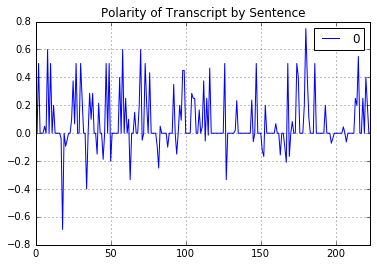

In [121]:
# dataframes have a handy plot method
pd.DataFrame(tone_change).plot(title='Polarity of Transcript by Sentence')

Interesting trend - does the talk seem to become more positive over time?

Anecdotally, we know that TED talks seek to motivate and inspire, which could be one explanation for this sentiment polarity pattern.

Play around with this data yourself!

---

# 2. Representations of Text for Computation

Text is messy and requires pre-processing. Once we've pre-processed and normalized the text, how do we use computation to understand it?

We may want to do a number of things computationally, but I'll focus generally on finding differences and similarities. In the case study, I'll focus on a **supervised classification** example, where these goals are key.

So let's start where we always do - counting words.

In [331]:
dict(t.word_counts)

{u'09': 1,
 u'1.6': 2,
 u'10': 2,
 u'15': 2,
 u'1970s': 1,
 u'1982': 2,
 u'1999': 1,
 u'24': 2,
 u'30': 4,
 u'34': 4,
 u'40': 1,
 u'50th': 1,
 u'60': 2,
 u'a': 69,
 u'able': 1,
 u'about': 24,
 u'abuse': 1,
 u'according': 1,
 u'accountability': 3,
 u'accounts': 4,
 u'accused': 6,
 u'across': 1,
 u'act': 9,
 u'activity': 2,
 u'actually': 1,
 u'admit': 2,
 u'advance': 2,
 u'advertised': 1,
 u'afraraymond.com': 1,
 u'africa': 1,
 u'again': 2,
 u'against': 2,
 u'ago': 5,
 u'airport': 4,
 u'alaska': 1,
 u'alaveteli.com': 2,
 u'all': 9,
 u'also': 3,
 u'always': 2,
 u'am': 3,
 u'american': 1,
 u'amount': 1,
 u'an': 12,
 u'and': 125,
 u'anniversary': 1,
 u'another': 1,
 u'answer': 1,
 u'any': 2,
 u'anything': 2,
 u'anywhere': 5,
 u'applause': 2,
 u'application': 1,
 u'applications': 1,
 u'applied': 1,
 u'applying': 1,
 u'appointed': 1,
 u'are': 16,
 u'around': 4,
 u'arrangements': 3,
 u'as': 12,
 u'ask': 2,
 u'asked': 6,
 u'assets': 1,
 u'at': 13,
 u'attention': 2,
 u'audience': 1,
 u'august': 

In [332]:
# put this in a dataframe for easy viewing and sorting
word_count_df = pd.DataFrame.from_dict(t.word_counts, orient='index')
word_count_df.columns = ['count']

What are the most common words?

In [333]:
word_count_df.sort('count', ascending=False)[:10]

,count
the,175
and,125
of,123
to,112
it,79
in,77
that,72
i,71
a,69
we,66


Hm. So the most common words will not tell us much about what's going on in this text.

In general, the **more frequent a word** is in the english language **or** in a text, the **less important** it will likely be to us. This concept is well known in text mining, called **"term frequency–inverse document frequency"**. We can represent text using a tf-idf statistic to weigh how important a term is in a particular document. This statistic gives contextual weight to different terms, more accurately representing the importance of different terms of ngrams.

#### Compare two transcripts

Let's look at two transcripts -

In [388]:
one = df.ix[16]
two = df.ix[20]
one['headline'], two['headline']

(u'A second opinion on developmental disorders',
 u'The mothers who found forgiveness, friendship')

In [389]:
len(one['transcript']), len(two['transcript'])

(5799, 5341)

In [390]:
one_blob = TextBlob(one['transcript'])
two_blob = TextBlob(two['transcript'])

In [391]:
one_set = set(one_blob.tokenize())
two_set = set(two_blob.tokenize())

In [392]:
# How many words did the two talks use commonly?
len(one_set.intersection(two_set))

118

In [418]:
# How many different words did they use total?
total_diff = len(one_set.difference(two_set)) + len(two_set.difference(one_set))
total_diff

550

In [419]:
proportion = len(one_set.intersection(two_set)) / float(total_diff)
print "Proportion of vocabulary that is common:", round(proportion, 4)*100, "%"

Proportion of vocabulary that is common: 21.45 %


In [400]:
print one_set.intersection(two_set)

set([u'all', u'just', u'human', u'suffer', u'children', u'(', u'had', u',', u'day', u'to', u'going', u'parents', u'suffered', u'then', u'Applause', u'very', u'me', u'suffering', u'words', u'not', u'now', u'him', u'like', u'these', u'each', u'For', u'are', u'our', u'special', u'really', u"n't", u'what', u'still', u'for', u'find', u'told', u'be', u'we', u'knew', u'This', u'never', u'here', u'change', u'on', u'about', u'her', u'of', u'could', u'or', u'When', u'one', u'been', u'story', u'from', u'would', u'there', u'three', u'But', u'.', u'their', u'much', u'too', u':', u'was', u'tell', u'today', u'knows', u'that', u'but', u'it', u'So', u'child', u'with', u'those', u'he', u'And', u'this', u'up', u'us', u'will', u'stories', u'can', u'were', u'my', u'called', u'and', u'is', u'mind', u'mine', u'an', u'say', u'something', u'have', u'in', u'as', u'if', u')', u'six', u'when', u'other', u'which', u'you', u'out', u"'s", u'I', u'who', u'most', u"'d", u'such', u"'m", u'a', u'later', u'It', u'so', u'

So what we start to see is that if we removed common words from this set, we'd see a few common themes between the two talks, but again, much of the vocabulary is common.

### Vectorizers

Let's go back to the dataframe of **most frequently used noun phrases across transcripts**

In [259]:
themes_list = speaker_themes_df['themes'].tolist()
speaker_themes_df[7:10]

,speaker,themes
7,Abraham Verghese,"[fildes, burntisland, laennec, bell, subsequen..."
8,Achenyo Idachaba,"[water hyacinth, gbe'borun, nigeria]"
9,Adam Davidson,"[fiscal cliff, vast majority, u.s., fiscal iss..."


In [322]:
# sci-kit learn is a machine learning library for python
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vocab = set([d for d in themes_list for d in d])

# we'll just look at ngrams > 2 to see some richer topics
cv = CountVectorizer(stop_words=None, vocabulary=vocab, ngram_range=(2, 4))

In [323]:
# going to turn these back into documents 
document_list = [','.join(t) for t in themes_list]

In [324]:
data = cv.fit_transform(document_list).toarray()

A **vectorizer** is a method that, understandably, creates vectors from data, and ultimately a matrix. Each vector contains the incidence (in this case) of a token across all the documents (in this case, transcripts).

**Sparsity**

In text analysis, any matrix representing a set of documents against a vocabulary will be **sparse**. This is because not every word in the vocabulary occurs in every document - quite the contrary. Most of each vector is empty.

<img src="assets/sparse_matrix.png">

In [325]:
cv.get_feature_names() # names of features

dist = np.sum(data, axis=0) 

counts_list = list()
for tag, count in zip(vocab, dist):
     counts_list.append((count, tag))

Which themes were most common across speakers?

In [326]:
count_df = pd.DataFrame(counts_list, columns=['count','feature'])
count_df.sort('count', ascending=False)[:20]

,count,feature
670,14,young people
2025,10,solar system
1144,9,good news
1772,8,breast cancer
211,7,human beings
829,7,high school
963,6,long time
225,6,cell phone
3456,6,stem cells
2918,6,social media


So the common theme is - Good News!

In Natural Language Processing, **Vectorization** is the most common way to abstract text to make it programmatically manipulable. It's your best friend once you get past document-level statistics!

_Further Reading:_
- [**Term-Frequency Inverse Document Frequency** Vectorization](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

### Don't forget -

If you don't know where to start, **just start counting things**.

---